In [1]:
import pandas as pd
import numpy as np

## Acquire Data

In [2]:
#!pip install kagglehub

In [3]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [4]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("CooperUnion/cardataset")

#print("Path to dataset files:", path)

In [5]:
df = pd.read_csv(data)

In [6]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


## Data Prep

In [7]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
# clean up the header

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [10]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [11]:
# clean up the value in the same way 

In [12]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

In [13]:
for c in strings: 
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [14]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [15]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [16]:
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [17]:
for col in df.columns: 
    print(col) 
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [18]:
# distribution of price 

In [19]:
# pip install matplotlib

In [20]:
#pip install seaborn

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

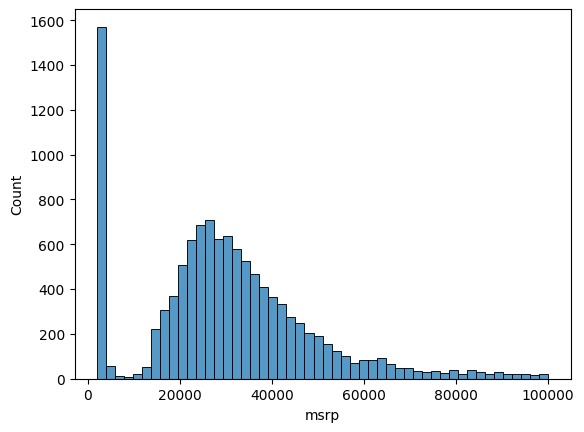

In [22]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)
plt.show()

In [23]:
# get rid of the long tail 

In [24]:
#log1p is taking the log of all value +1 , to avoid 0 
price_log = np.log1p(df.msrp)

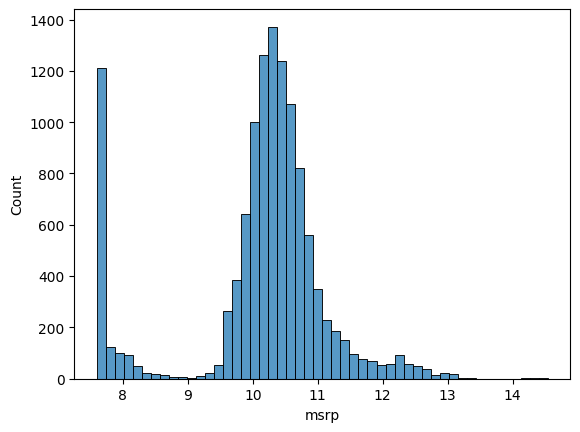

In [25]:
sns.histplot(price_log, bins=50)
plt.show()
#looks like a normal distribution, bell shaped 

In [26]:
# missing value

In [27]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## Set up Validation and Testing set 

In [28]:
n = len(df) # total amount 
n_val  = int(n * 0.2)
n_test  = int(n * 0.2)
n_train  = n - n_val - n_test

In [29]:
n, n_test, n_val, n_train

(11914, 2382, 2382, 7150)

In [30]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val + n_test]
df_train = df.iloc[n_test + n_val :]

In [31]:
idx = np.arange(n)

In [32]:
np.random.shuffle(idx)

In [33]:
idx

array([3454, 6788, 2739, ...,  399, 6151, 9203])

In [34]:
df_train = df.iloc[idx[:n_train]]
df_test = df.iloc[idx[n_train:n_train+n_test]]
df_val = df.iloc[idx[n_train+n_test:]]


In [35]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
3454,dodge,dakota,2009,regular_unleaded,210.0,6.0,manual,rear_wheel_drive,4.0,flex_fuel,compact,crew_cab_pickup,20,16,1851,25260
6788,acura,mdx,2017,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,27,19,204,43950
2739,chevrolet,cobalt,2008,regular_unleaded,173.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,32,22,1385,19695
4297,lotus,exige,2011,premium_unleaded_(recommended),257.0,4.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,26,20,613,74950
4782,ford,focus,2015,flex-fuel_(unleaded/e85),160.0,4.0,automated_manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,40,27,5657,23170


In [36]:
len(df_train), len(df_val), len(df_test)


(7150, 2382, 2382)

In [37]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [38]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [39]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [40]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,dodge,dakota,2009,regular_unleaded,210.0,6.0,manual,rear_wheel_drive,4.0,flex_fuel,compact,crew_cab_pickup,20,16,1851
1,acura,mdx,2017,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,27,19,204
2,chevrolet,cobalt,2008,regular_unleaded,173.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,32,22,1385
3,lotus,exige,2011,premium_unleaded_(recommended),257.0,4.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,26,20,613
4,ford,focus,2015,flex-fuel_(unleaded/e85),160.0,4.0,automated_manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,40,27,5657


## Linear Regression

In [41]:
df_train.iloc[10]

make                                         bmw
model                                   2_series
year                                        2016
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  240.0
engine_cylinders                             4.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category               luxury,performance
vehicle_size                             compact
vehicle_style                              coupe
highway_mpg                                   35
city_mpg                                      23
popularity                                  3916
Name: 10, dtype: object

In [42]:
y_train[10]

10.39973746484973

In [43]:
xi = [240,17,870] #taking hp, mpg, popularity
w0 = 7.60
w = [1,1,1]


In [44]:
def linear_regression(xi): 
    n = len(xi)
    pred = w0 
    
    for j in range(n): 
        pred = pred + xi[j] * w[j]
    return pred 
    

In [45]:
linear_regression(xi)

1134.6

In [46]:
xi = [240,17,870]
w0 = 7
w = [0.001,0.001,0.001]

In [47]:
linear_regression(xi)

8.127

In [48]:
np.exp(8.127)-1

3383.6304277788245

In [49]:
np.expm1(8.127)

3383.6304277788245

## Linear regression vector form

In [50]:
def dot(xi, w): 
    n = len(xi) 

    prod = 0 
    for j in range(n):
        prod = prod + xi[j] * w[j]

    return prod 
    

In [51]:
def linear_regression(xi): 
    
    pred = w0 + dot(xi,w)

    return pred 

In [52]:
w_new = [w0] + w
w_new

[7, 0.001, 0.001, 0.001]

In [53]:
xi_new = [1] + xi
xi_new

[1, 240, 17, 870]

In [54]:
def linear_regression(xi): 
    return dot(xi,w_new)

In [55]:
linear_regression(xi_new)

8.127

In [56]:
df_train[:5]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,dodge,dakota,2009,regular_unleaded,210.0,6.0,manual,rear_wheel_drive,4.0,flex_fuel,compact,crew_cab_pickup,20,16,1851
1,acura,mdx,2017,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,27,19,204
2,chevrolet,cobalt,2008,regular_unleaded,173.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,32,22,1385
3,lotus,exige,2011,premium_unleaded_(recommended),257.0,4.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,26,20,613
4,ford,focus,2015,flex-fuel_(unleaded/e85),160.0,4.0,automated_manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,40,27,5657


In [57]:
x1 = [1, 543, 10, 67]
x2 = [1, 166, 24, 19]
x3 = [1, 128, 33, 27]
X = [x1,x2,x3]
X = np.array(X)
X

array([[  1, 543,  10,  67],
       [  1, 166,  24,  19],
       [  1, 128,  33,  27]])

In [58]:
X.dot(w_new)

array([7.62 , 7.209, 7.188])

In [59]:
def linear_regression(X): 
    
    return X.dot(w_new)

## Training a Linear Regression Model

In [60]:
# solve the martrix
# w = inv(Xt X) Xt y 

In [61]:
def train_linear_regression(X, y): 
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))
    XT = X.T
    XTX = XT.dot(X)
    XTX_inv = np.linalg.inv(XTX)

    w = XTX_inv.dot(XT).dot(y)
    
    return w[0], w[1:]
    

In [62]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]
X= [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [63]:
ones = np.ones(X.shape[0])
X = np.column_stack((ones, X))
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [64]:
XT = X.T
XT

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00],
       [1.480e+02, 1.320e+02, 4.530e+02, 1.580e+02, 1.720e+02, 4.130e+02,
        3.800e+01, 1.420e+02, 4.530e+02],
       [2.400e+01, 2.500e+01, 1.100e+01, 2.400e+01, 2.500e+01, 1.100e+01,
        5.400e+01, 2.500e+01, 3.100e+01],
       [1.385e+03, 2.031e+03, 8.600e+01, 1.850e+02, 2.010e+02, 8.600e+01,
        1.850e+02, 4.310e+02, 8.600e+01]])

In [65]:
XTX = XT.dot(X)

In [66]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

In [67]:
w = XTX_inv.dot(XT).dot(y)
w

array([ 2.58447541e+04, -1.60890647e+01, -1.99472549e+02, -1.22802883e+00])

In [68]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]
X= [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [69]:
train_linear_regression(X,y)

(25844.754055766753, array([ -16.08906468, -199.47254894,   -1.22802883]))

## Car price baseline model

In [70]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [71]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [72]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']
X_train = df_train[base]

In [73]:
X_train.isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [74]:
X_train = X_train.fillna(0)

In [75]:
X_train.isnull().sum()

engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [76]:
w0, w = train_linear_regression(X_train, y_train)
w0, w

(7.832176628573874,
 array([ 9.40260071e-03, -1.36306329e-01,  1.46861790e-02,  1.76330772e-02,
        -1.50180266e-05]))

In [77]:
y_pred = w0 + X_train.dot(w)
y_pred

0        9.536939
1       10.469584
2        9.750687
3       10.428716
4        9.769951
          ...    
7145    10.218460
7146     9.551610
7147    10.808303
7148    10.040997
7149    10.702096
Length: 7150, dtype: float64

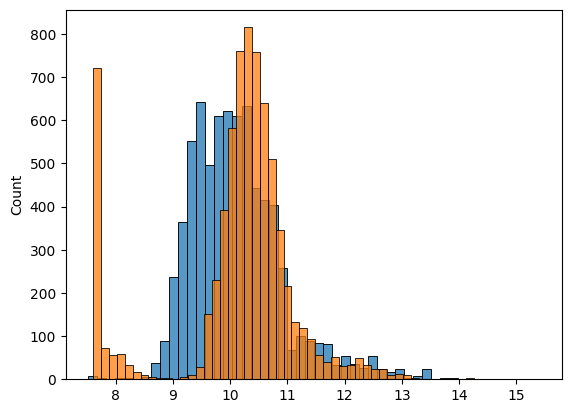

In [78]:
sns.histplot(y_pred, bins=50)
sns.histplot(y_train, bins=50)
plt.show()

## RMSE

In [79]:
def rmse(y, y_pred): 
    se = (y - y_pred) **2 
    mse = se.mean()
    rmse = np.sqrt(mse)
    
    return rmse

In [80]:
rmse(y_train, y_pred)

0.7487485643206008

In [81]:
type((y_train - y_pred) **2 )

pandas.core.series.Series

## Validating the model

In [82]:
def prepare_X(df): 
    df_num = df[base]
    df_num= df_num.fillna(0)
    

    return df_num

In [83]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)

rmse(y_val, y_val_pred) 

0.7504215817286588

## Simple feature engineering

In [84]:
df_train.columns
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [85]:
def prepare_X(df): 
    df['age'] = 2017 - df['year']
    features = base + ['age']
    df_num = df[features]
    df_num= df_num.fillna(0)
    

    return df_num

In [86]:
X_train = prepare_X(df_train)
X_train

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity,age
0,210.0,6.0,20,16,1851,8
1,290.0,6.0,27,19,204,0
2,173.0,4.0,32,22,1385,9
3,257.0,4.0,26,20,613,6
4,160.0,4.0,40,27,5657,2
...,...,...,...,...,...,...
7145,282.0,6.0,23,17,5657,0
7146,200.0,6.0,25,18,1851,13
7147,325.0,6.0,28,20,1715,3
7148,275.0,6.0,19,14,5657,1


In [87]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)


In [88]:
X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)
rmse(y_val, y_val_pred)

0.5168019547380724

<Axes: ylabel='Count'>

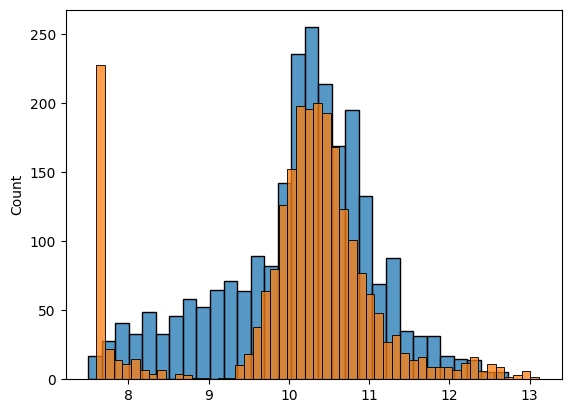

In [89]:
sns.histplot(y_val_pred)
sns.histplot(y_val)


## Categorical variables

In [90]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
age                    int64
dtype: object

In [112]:
categorical_columns = ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 
                      'vehicle_size','vehicle_style']


In [110]:
df['make'].value_counts().head().index

Index(['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'], dtype='object', name='make')

In [117]:
catagories = {}

for cat in categorical_columns: 
    catagories[cat] = list(df[cat].value_counts().head().index)

catagories   

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [ ]:
for v in [2,3,4]: 
    df_train['num_doors_%s' % v ] = (df_train.number_of_doors == v ).astype('int')

In [122]:
def prepare_X(df): 
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base.copy()
    features.append('age')
    
    for v in [2,3,4]: 
        df['num_doors_%s' % v ] = (df.number_of_doors == v ).astype('int')
        features.append('num_doors_%s' % v)

    for c, values in catagories.items(): 
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c,v))
            
    df_num = df[features]
    df_num= df_num.fillna(0)       
    return df_num

In [123]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)
rmse(y_val, y_val_pred)

39.77800357355909

In [126]:
w0, w

(3383146156103115.0,
 array([-1.44161846e-02, -2.31296363e+00,  2.22477007e-01, -1.21309135e+00,
        -7.83259769e-04, -8.37171474e-01, -7.49350888e+02, -7.35165717e+02,
        -7.43524222e+02, -1.52332224e+01, -4.84539472e+00, -5.38127858e+00,
        -1.46090187e+01, -5.54694916e+00,  6.09279448e+01,  6.61712176e+01,
         6.16892109e+01,  5.61341187e+01,  7.07043417e+01, -2.88583334e+15,
        -2.88583334e+15, -2.88583334e+15, -2.88583334e+15, -2.88583334e+15,
        -4.97312818e+14, -4.97312818e+14, -4.97312818e+14, -4.97312818e+14,
         9.87010626e-01,  3.69060306e-01,  8.93873771e-01,  1.62385254e+00,
        -5.68401442e-01,  4.84024045e+01,  4.82350131e+01,  5.20930748e+01,
        -3.20727814e-02,  4.97588809e-02,  1.85532596e-01,  2.76207427e-01,
        -1.28394303e-01]))

## Regularization

In [ ]:
# when a feature is a linear combination of other features, then most likely it will not have an inverse
# add a small number to the columns might bypass the problem, but when applying normal equation with this feature, the value associalted 
# with the duplicated column will be very large => decrease the performance 
# way to solve this is to add a small number to the diagnal

In [135]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.0000001],
]

X = np.array(X)
X

array([[4.       , 4.       , 4.       ],
       [3.       , 5.       , 5.       ],
       [5.       , 1.       , 1.       ],
       [5.       , 4.       , 4.       ],
       [7.       , 5.       , 5.       ],
       [4.       , 5.       , 5.0000001]])

In [138]:
XTX = X.T.dot(X)
XTX

array([[140.       , 111.       , 111.0000004],
       [111.       , 108.       , 108.0000005],
       [111.0000004, 108.0000005, 108.000001 ]])

In [139]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.92646538e-02, -1.54615164e+05,  1.54615121e+05],
       [-1.54615170e+05,  3.51843724e+13, -3.51843721e+13],
       [ 1.54615129e+05, -3.51843721e+13,  3.51843718e+13]])

In [141]:
y = [1,2,3,1,2,3]

In [144]:
w = XTX_inv.dot(X.T).dot(y)
w

array([ 2.73776578e-01, -4.41093100e+06,  4.41093113e+06])

In [152]:
XTX = [
    [1,2,2],
    [2,3.0001,4.00001], 
    [2,3,4.000001]
]
np.linalg.inv(XTX)

array([[ 4.14439951e+01, -2.22219975e+05,  2.22199753e+05],
       [ 1.99997778e+00,  1.11109877e-01, -1.11109877e+00],
       [-2.22219753e+01,  1.11109877e+05, -1.11098766e+05]])

In [154]:
np.linalg.inv(XTX + np.eye(3)*0.03)

array([[ -9.28698542,  90.55077633, -85.26797884],
       [  2.63660747,  -6.63310299,   5.27525014],
       [  2.64619002, -40.00054683,  38.63775897]])

In [165]:
def train_linear_regression(X, y, r = 0.001): 
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))
    XT = X.T
    XTX = XT.dot(X)
    # add in regularization 
    eye = np.eye(XTX.shape[0])
    
    
    XTX_inv = np.linalg.inv(XTX + r * eye)

    w = XTX_inv.dot(XT).dot(y)
    
    return w[0], w[1:]

In [172]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train, r = 0.001)
X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)
rmse(y_val, y_val_pred)

0.46192831013345403

## Using the model

In [ ]:
# finding the best parameter (r)

In [174]:
for r in [0.0, 0.1, 0.01, 0.001, 0.0001, 1, 10 ]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train, r = r)
    X_val = prepare_X(df_val)
    y_val_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_val_pred)
    print(score, r)

39.77800357355909 0.0
0.46187655521484433 0.1
0.46190470453085514 0.01
0.46192831013345403 0.001
0.4619309547519756 0.0001
0.4643916654816016 1
0.47781589568072014 10


In [177]:
r = 0.001
w0, w = train_linear_regression(X_train, y_train, r = r)
X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)
rmse(y_val, y_val_pred)

0.46192831013345403

## Using the modal

In [184]:
df_full_train = pd.concat([df_train, df_val])

In [185]:
df_full_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,age
0,dodge,dakota,2009,regular_unleaded,210.0,6.0,manual,rear_wheel_drive,4.0,flex_fuel,compact,crew_cab_pickup,20,16,1851,8
1,acura,mdx,2017,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,"crossover,luxury",midsize,4dr_suv,27,19,204,0
2,chevrolet,cobalt,2008,regular_unleaded,173.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,32,22,1385,9
3,lotus,exige,2011,premium_unleaded_(recommended),257.0,4.0,manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,26,20,613,6
4,ford,focus,2015,flex-fuel_(unleaded/e85),160.0,4.0,automated_manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,40,27,5657,2


In [186]:
X_full_train = prepare_X(df_full_train)

In [189]:
y_full_train = np.concatenate([y_train, y_val])

In [192]:
w0, w = train_linear_regression(X_full_train, y_full_train, r = 0.001)
X_test = prepare_X(df_test)
y_test_pred = w0 + X_test.dot(w)
rmse(y_test, y_test_pred)

0.4663397425143667

In [193]:
df_test.iloc[20]

make                              dodge
model                           ram_250
year                               1992
engine_fuel_type       regular_unleaded
engine_hp                         180.0
engine_cylinders                    6.0
transmission_type                manual
driven_wheels          rear_wheel_drive
number_of_doors                     2.0
market_category                     NaN
vehicle_size                      large
vehicle_style        regular_cab_pickup
highway_mpg                          17
city_mpg                             13
popularity                         1851
Name: 20, dtype: object

In [195]:
car = df_test.iloc[20].to_dict()
car
# pretend that this car came from the website input

{'make': 'dodge',
 'model': 'ram_250',
 'year': 1992,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 180.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'manual',
 'driven_wheels': 'rear_wheel_drive',
 'number_of_doors': 2.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'regular_cab_pickup',
 'highway_mpg': 17,
 'city_mpg': 13,
 'popularity': 1851}

In [200]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,dodge,ram_250,1992,regular_unleaded,180.0,6.0,manual,rear_wheel_drive,2.0,NaN,large,regular_cab_pickup,17,13,1851


In [204]:
X_small = prepare_X(df_small)
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]


In [207]:
price = np.expm1(y_pred)
price

2370.996451104889

In [209]:
actual_price = np.expm1(y_test[20])
actual_price

2000.0